<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Classification and KNN with NHL data

_Authors: Joseph Nelson (DC)_

---

Below you will practice KNN classification on a dataset of NHL statistics.

You will be predicting the `Rank` of a team from predictor variables of your choice.

In [50]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [51]:
# web location:
local_csv = './NHL_Data_GA.csv'

### 1. Load the NHL data

In [52]:
df = pd.read_csv(local_csv)

### 2. Perform any required data cleaning. Do some EDA.

In [53]:
# Check the shape
df.shape

(90, 28)

In [54]:
# Check for null values
df.isnull().sum()

Team    0
PTS     0
Rank    0
TOI     0
GF      0
GA      0
GF60    0
GA60    0
GF%     0
SF      0
SA      0
SF60    0
SA60    0
SF%     0
FF      0
FA      0
FF60    0
FA60    0
FF%     0
CF      0
CA      0
CF60    0
CA60    0
CF%     0
Sh%     0
Sv%     0
PDO     0
PIM     0
dtype: int64

In [55]:
# Check the datatypes
df.dtypes

Team     object
PTS       int64
Rank      int64
TOI      object
GF        int64
GA        int64
GF60    float64
GA60    float64
GF%     float64
SF        int64
SA        int64
SF60    float64
SA60    float64
SF%     float64
FF        int64
FA        int64
FF60    float64
FA60    float64
FF%     float64
CF        int64
CA        int64
CF60    float64
CA60    float64
CF%     float64
Sh%     float64
Sv%     float64
PDO       int64
PIM       int64
dtype: object

In [56]:
# Check the Team values
df.Team.value_counts().sort_values()

Washington10     1
Los Angeles11    1
St. Louis11      1
Detroit10        1
Vancouver10      1
                ..
Carolina11       1
Buffalo12        1
Chicago11        1
Toronto10        1
Columbus10       1
Name: Team, Length: 90, dtype: int64

In [57]:
# Splice off fhe year from team and make it a new column
df['Year'] = df.Team.str.slice(start = -2)

In [58]:
# Splice off fhe year from team and keep the team as a new column
df ['team'] = df.Team.str.slice(stop = -2)

In [59]:
# Check the head 
df.head(1)

,Team,PTS,Rank,TOI,GF,GA,GF60,GA60,GF%,SF,...,CA,CF60,CA60,CF%,Sh%,Sv%,PDO,PIM,Year,team
0,Washington10,121,1,2001:52:00,115,73,3.45,2.19,61.2,1112,...,1935,64.1,58.0,52.5,10.34,93.03,1034,1269,10,Washington


### 3. Set up the `Rank` variable as your target. How many classes are there?

In [60]:
# Create response vector (y)
y = df.Rank

In [61]:
# Rank has three classes of accuracy 
df.Rank.value_counts().sort_values()

1    29
2    30
3    31
Name: Rank, dtype: int64

### 4. What is the baseline accuracy?

In [62]:
print('The baseline accuracy is c.33%')

The baseline accuracy is c.33%


### 5. Choose 4 features to be your predictor variables and set up your design matrix.

In [63]:
# Check for which features most strongly correlate against the response (Rank) 
abs(df.corr()['Rank']).sort_values(ascending=False)

Rank    1.000000
PTS     0.905004
GF%     0.653633
CF%     0.598466
FF%     0.585340
SF%     0.577347
CA60    0.537879
GA60    0.536279
GA      0.535782
SF60    0.484563
FA60    0.477409
GF      0.475713
FF60    0.466239
SF      0.446335
SA60    0.443970
FF      0.425059
CA      0.423351
GF60    0.409616
CF60    0.403508
CF      0.383993
PDO     0.365246
FA      0.364666
Sv%     0.324691
SA      0.324561
Sh%     0.168314
PIM     0.166454
Name: Rank, dtype: float64

In [64]:
# Highest correlators are PTS, GF%, CF%, FF%
# Create feature matrix (X).
feature_cols = ['PTS', 'GF%', 'CF%', 'FF%']
X = df[feature_cols]

### 6. Fit a `KNeighborsClassifier` with 1 neighbor using the target and predictors.

In [65]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [66]:
#  Split X and y into training and testing sets (using random_state for reproducibility).
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state=99)

In [67]:
# Train the model on the training set (using K=1)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

### 7. Evaluate the accuracy of your model.
- Is it better than baseline?
- Is it legitimate?

In [68]:
# accuracy = the correct number of predictions divided by the total predictions made
y_pred_class = knn.predict(X_test)
print((metrics.accuracy_score(y_test, y_pred_class)))

0.8260869565217391


In [69]:
# No because the features selected are highly likely to be correlated to one another

### 8. Create a 50-50 train-test-split of your target and predictors. Refit the KNN and assess the accuracy.

In [70]:
#  Split X and y into training and testing sets (using random_state for reproducibility) and 50/50 split.
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.5, random_state=99)

In [71]:
# Train the model on the training set (using K=1)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [72]:
# accuracy = the correct number of predictions divided by the total predictions made
y_pred_class = knn.predict(X_test)
print((metrics.accuracy_score(y_test, y_pred_class)))

0.9333333333333333


In [73]:
# Accuracy is greater for 50 % test compared to 25%. 

### 9. Evaluate the test accuracy of a KNN where K == number of rows in the training data.

In [74]:
# number of rows in the training data
len(X_train)

45

In [75]:
# Train the model on the training set (using K=45)
knn = KNeighborsClassifier(n_neighbors=(len(X_train)))
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=45, p=2,
                     weights='uniform')

In [76]:
# accuracy = the correct number of predictions divided by the total predictions made
y_pred_class = knn.predict(X_test)
print((metrics.accuracy_score(y_test, y_pred_class)))

0.3111111111111111


In [77]:
# The accuracy of K = number of rows in the training data is almost identical to the baseline 

### 10. Fit the KNN at values of K from 1 to the number of rows in the training data.
- Store the test accuracy in a list.
- Plot the test accuracy vs. the number of neighbors.

In [96]:
# Calculate TRAINING ERROR and TESTING ERROR for K=1 through the number of rows of the training data.

k_range = list(range(1, len((X_train))))
training_error = []
testing_error = []


for k in k_range:

    # Instantiate the model with the current K value.
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    # Calculate training error (error = 1 - accuracy).
    y_pred_class = knn.predict(X)
    training_accuracy = metrics.accuracy_score(y, y_pred_class)
    training_error.append(1 - training_accuracy)
    
    # Calculate testing error.
    y_pred_class = knn.predict(X_test)
    testing_accuracy = metrics.accuracy_score(y_test, y_pred_class)
    testing_error.append(1 - testing_accuracy)

In [97]:
# Allow plots to appear in the notebook.
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [80]:
# Create a DataFrame of K, training error, and testing error.
column_dict = {'K': k_range, 'training error':training_error, 'testing error':testing_error}
df = pd.DataFrame(column_dict).set_index('K').sort_index(ascending=False)
#df
print(df.to_string())

    training error  testing error
K                                
44        0.655556       0.688889
43        0.377778       0.400000
42        0.355556       0.377778
41        0.366667       0.377778
40        0.366667       0.377778
39        0.366667       0.377778
38        0.388889       0.400000
37        0.400000       0.400000
36        0.411111       0.422222
35        0.433333       0.444444
34        0.433333       0.444444
33        0.433333       0.444444
32        0.433333       0.444444
31        0.433333       0.444444
30        0.477778       0.511111
29        0.422222       0.444444
28        0.411111       0.422222
27        0.244444       0.200000
26        0.188889       0.155556
25        0.155556       0.133333
24        0.077778       0.044444
23        0.066667       0.044444
22        0.044444       0.066667
21        0.077778       0.088889
20        0.088889       0.111111
19        0.077778       0.088889
18        0.066667       0.066667
17        0.04

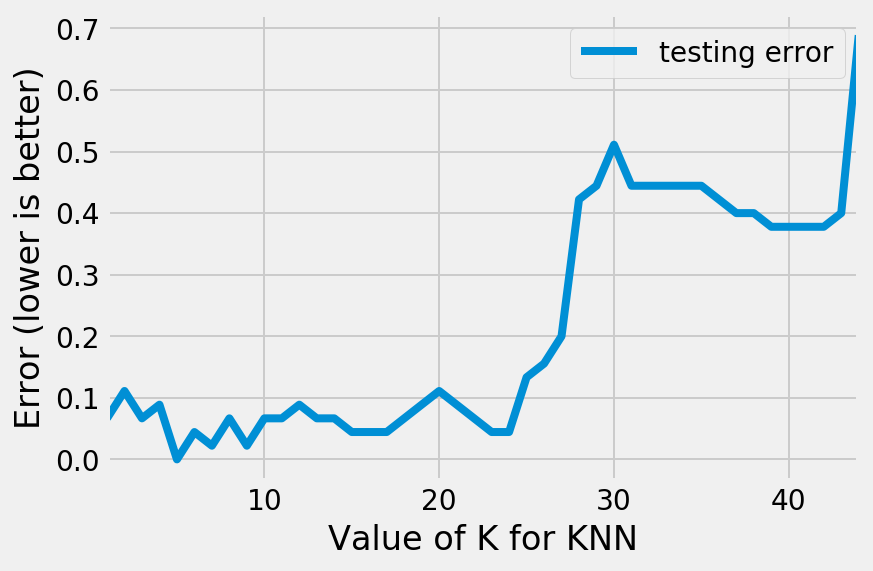

In [81]:
# Plot the relationship between K (HIGH TO LOW) and TESTING ERROR.
df.plot(y='testing error');
plt.xlabel('Value of K for KNN');
plt.ylabel('Error (lower is better)');

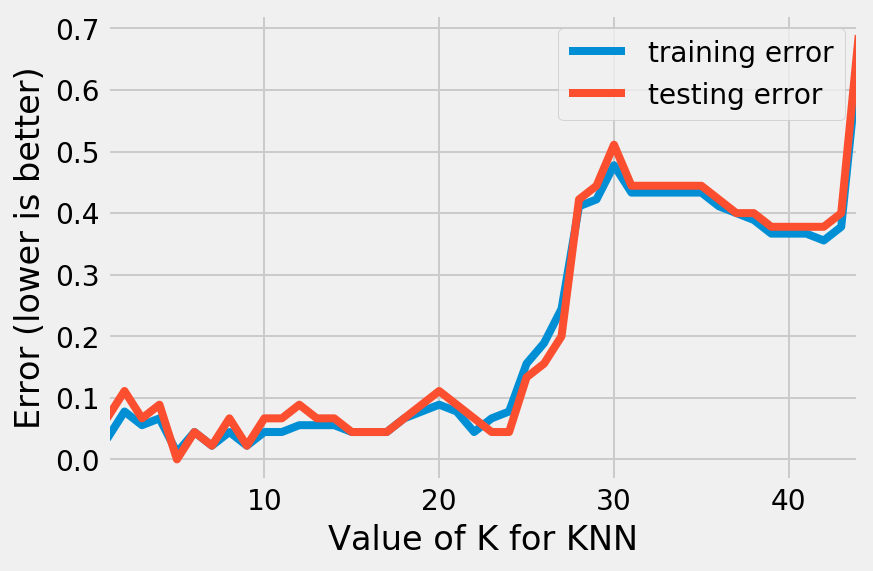

In [82]:
# Plot the relationship between K (HIGH TO LOW) and both TRAINING ERROR and TESTING ERROR.
df.plot();
plt.xlabel('Value of K for KNN');
plt.ylabel('Error (lower is better)');

### 11. Fit KNN across different values of K and plot the mean cross-validated accuracy with 5 folds.

In [83]:
# k = 5

In [84]:
# Train the model on the training set (using K=5)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [85]:
from sklearn import model_selection
from sklearn.linear_model import LinearRegression

In [86]:
kf = model_selection.KFold(n_splits=5, shuffle=True)

In [87]:
mse_values = []
scores = []
n = 0

print("~~~~ CROSS VALIDATION each fold ~~~~")
for train_index, test_index in kf.split(X, y):
    lr = LinearRegression().fit(X.iloc[train_index], y.iloc[train_index])
    
    mse_values.append(metrics.mean_squared_error(y.iloc[test_index], lr.predict(X.iloc[test_index])))
    scores.append(lr.score(X, y))
    
    n += 1
    
    print('Model {}'.format(n))
    print('MSE: {}'.format(mse_values[n-1]))
    print('R2: {}\n'.format(scores[n-1]))


print("~~~~ SUMMARY OF CROSS VALIDATION ~~~~")
print('Mean of MSE for all folds: {}'.format(np.mean(mse_values)))
print('Mean of R2 for all folds: {}'.format(np.mean(scores)))

~~~~ CROSS VALIDATION each fold ~~~~
Model 1
MSE: 0.09250356882834292
R2: 0.8238756878621875

Model 2
MSE: 0.12152715709256073
R2: 0.8242426286753063

Model 3
MSE: 0.1319627417953296
R2: 0.8243515242029242

Model 4
MSE: 0.16463005004069428
R2: 0.8223861567333673

Model 5
MSE: 0.19930952481416458
R2: 0.8121745849523501

~~~~ SUMMARY OF CROSS VALIDATION ~~~~
Mean of MSE for all folds: 0.14198660851421843
Mean of R2 for all folds: 0.8214061164852271


In [88]:
# k = 40

In [89]:
# Train the model on the training set (using K=40)
knn = KNeighborsClassifier(n_neighbors=40)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=40, p=2,
                     weights='uniform')

In [90]:
kf = model_selection.KFold(n_splits=5, shuffle=True)

In [91]:
mse_values = []
scores = []
n = 0

print("~~~~ CROSS VALIDATION each fold ~~~~")
for train_index, test_index in kf.split(X, y):
    lr = LinearRegression().fit(X.iloc[train_index], y.iloc[train_index])
    
    mse_values.append(metrics.mean_squared_error(y.iloc[test_index], lr.predict(X.iloc[test_index])))
    scores.append(lr.score(X, y))
    
    n += 1
    
    print('Model {}'.format(n))
    print('MSE: {}'.format(mse_values[n-1]))
    print('R2: {}\n'.format(scores[n-1]))


print("~~~~ SUMMARY OF CROSS VALIDATION ~~~~")
print('Mean of MSE for all folds: {}'.format(np.mean(mse_values)))
print('Mean of R2 for all folds: {}'.format(np.mean(scores)))

~~~~ CROSS VALIDATION each fold ~~~~
Model 1
MSE: 0.15950662061406223
R2: 0.824615023135414

Model 2
MSE: 0.11707612334595992
R2: 0.8237762883884152

Model 3
MSE: 0.08636183680620638
R2: 0.82407444795034

Model 4
MSE: 0.1273732674786888
R2: 0.8232269279661866

Model 5
MSE: 0.14956876039494035
R2: 0.8243791205092369

~~~~ SUMMARY OF CROSS VALIDATION ~~~~
Mean of MSE for all folds: 0.12797732172797155
Mean of R2 for all folds: 0.8240143615899186


### 12. Standardize the predictor matrix and cross-validate across the different K.
- Plot the standardized mean cross-validated accuracy against the unstandardized. Which is better?
- Why?

In [92]:
# Instantiate and fit StandardScaler.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [93]:
# Calculate testing error.
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred_class = knn.predict(X_test)
testing_accuracy = metrics.accuracy_score(y_test, y_pred_class)
testing_error = 1 - testing_accuracy

print(testing_accuracy)
#print(testing_error)

0.8222222222222222


In [94]:
# Calculate testing error.
knn = KNeighborsClassifier(n_neighbors=40)
knn.fit(X_train, y_train)

y_pred_class = knn.predict(X_test)
testing_accuracy = metrics.accuracy_score(y_test, y_pred_class)
testing_error = 1 - testing_accuracy

print(testing_accuracy)
#print(testing_error)

0.4888888888888889


In [95]:
# k = 5 is more accurate than k = 40 because the the full data set has only 150 rows.